# Prediction Model - Ridge or Lasso regression in collaboration with Cross-Validation

## Data Set 1 - Airfares

__Simple Predictive Model (1 variable)__ - My decison variable was same as mentioned in the solution notebook. However, from the solution notebook I've learnt that it's a good idea to use describe() just to learn more about the data one is  working with.

__Mid Complex Predictive Model (3 variables)__ - The idea of not using Coupon as it is relatively correlated with Distance was a good idea. However' I assumed that coupon directly impacts with Fare and hence it will be a good variable to predict. Additionaly I've used the income variables but I feel that a calulated variable such as squared_distance can be a really good metric to test the model.

__Complex Predictive Model (All Variables)__ - My final model was the best among three models as well. From the solution notebook I've learnt the way how alphas are calulated each time and to make a good use of cross-validation.

## Data Set 1 - BostonHousing

__Simple Predictive Model (1 variable)__ - Based on the data and the correlation Matrix I found RM to have the highest correlation hence that was used in the model. I realized that CAT.MEDV would be a derived variable of MEDV and the correlation between them was strong therefore I picked up RM instead. From the solution notebook I feel it could have been a better idea to drop this variable instead.

__Mid Complex Predictive Model (3 variables)__ - I've now learnt that it's a better idea to use a calculated field instead of directly using the field in the model based on the variablity of the metric in comparison with dependent variable.

__Complex Predictive Model (All Variables)__ - My final model was the best among three models there wasn't much difference in the first two models however the third model seems to be the best fit, as in the solution notebook. 

## Data Set 1 - ToyotaCorolla

__Simple Predictive Model (1 variable)__ - My approach was a bit diferent as compared to the solution notebook.I considered trying to create dummy variables, however I used BroadComputers as an input to the model as it had one of the highest correlation with Price

__Mid Complex Predictive Model (3 variables)__ - From the solution notebook I've learnt that it can be great alternative to use the manufacture years individually.

__Complex Predictive Model (All Variables)__ - The final model was the best among the three.


__Overall I feel I have a good understanding of regression now, Thank you Professor Pofahl! and my takeaway would be to consider caluculated variables instead of using them directly.__

## DataSet 1: The following code is to do analysis on Airfares Dataset

Step 1: Drop the columns S_CODE, S_CITY, E_CODE, and E_CITY on Airfares.csv

In [109]:
# Importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,LassoCV,Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd  
import seaborn as sns 

%matplotlib inline

# Check all the columns present in the Airfare.csv file

Airfare_DataFrame = pd.read_csv("Airfares.csv")
Airfare_Columns = list(pd.read_csv("Airfares.csv", nrows =1))
print(Airfare_Columns)

['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX', 'FARE']


In [110]:
# Drop the columns S_CODE, S_CITY, E_CODE, and E_CITY
Airfare_DataFrame = Airfare_DataFrame.drop(columns=['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY'])
Airfare_DataFrame.head()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


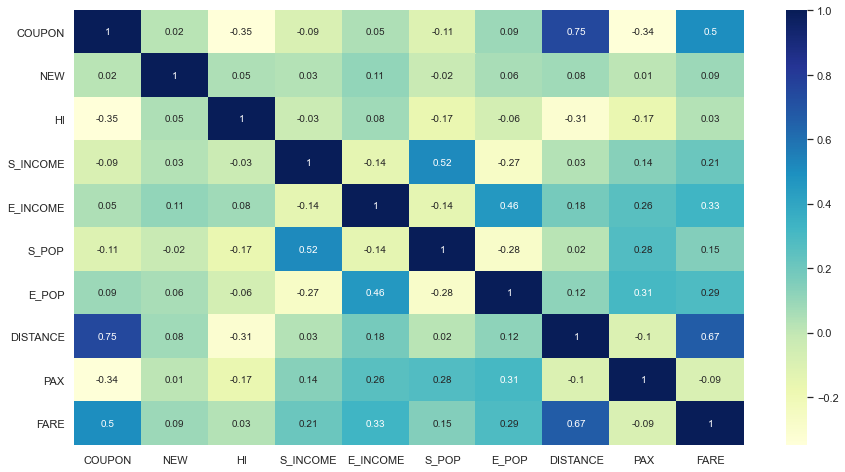

In [111]:
# Optional - One can set the size of the heatmap to avoid congestion
plt.figure(figsize = (15,8))

# Find the correlation of metrics with each other and round the values to two decimal places
Airfare_Corr_Matrix = Airfare_DataFrame.corr().round(2)

# Print the values using a heatmap to visually learn the strength of Correlation between the metrics
sns.heatmap(data=Airfare_Corr_Matrix, annot=True, cmap="YlGnBu")
plt.show()

In [112]:
# One of the step in data cleaning process is to check for duplicates and the duplicated() helps us find them.
Airfare_DataFrame[Airfare_DataFrame.duplicated()]

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
15,1.00,3,No,No,2626.90,32991.0,29838.0,8621121,7145897,Controlled,Free,181,7171,117.23
29,1.01,3,No,No,4040.09,32991.0,23184.0,8621121,1173217,Controlled,Free,291,12432,134.30
40,1.12,3,No,No,8714.03,32991.0,25237.0,8621121,1318892,Controlled,Constrained,539,9305,250.73
59,1.36,3,No,No,2421.04,32991.0,22263.0,8621121,472254,Controlled,Free,1636,5185,154.74
98,1.07,3,No,No,4840.48,32991.0,24348.0,8621121,111745,Controlled,Free,457,7574,180.85
158,1.00,0,Yes,Yes,2522.01,24706.0,24575.0,9056076,1197234,Free,Free,238,51358,55.57
187,1.29,3,No,No,6108.57,32991.0,26695.0,8621121,1646147,Controlled,Free,736,6590,190.09
208,1.26,3,No,No,3647.27,32991.0,25995.0,8621121,1115048,Controlled,Free,760,7387,215.01
218,1.92,3,No,No,1940.17,22089.0,32991.0,668159,8621121,Controlled,Free,1822,4002,208.79
221,1.06,3,No,No,4593.38,26993.0,32991.0,3532657,8621121,Controlled,Free,756,48642,162.28


In [113]:
# As we see that there are some duplicate values present we drop them by using drop_duplicates()
Airfare_DataFrame.drop_duplicates(keep='first',inplace=True)
Airfare_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 637
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COUPON    586 non-null    float64
 1   NEW       586 non-null    int64  
 2   VACATION  586 non-null    object 
 3   SW        586 non-null    object 
 4   HI        586 non-null    float64
 5   S_INCOME  586 non-null    float64
 6   E_INCOME  586 non-null    float64
 7   S_POP     586 non-null    int64  
 8   E_POP     586 non-null    int64  
 9   SLOT      586 non-null    object 
 10  GATE      586 non-null    object 
 11  DISTANCE  586 non-null    int64  
 12  PAX       586 non-null    int64  
 13  FARE      586 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 68.7+ KB


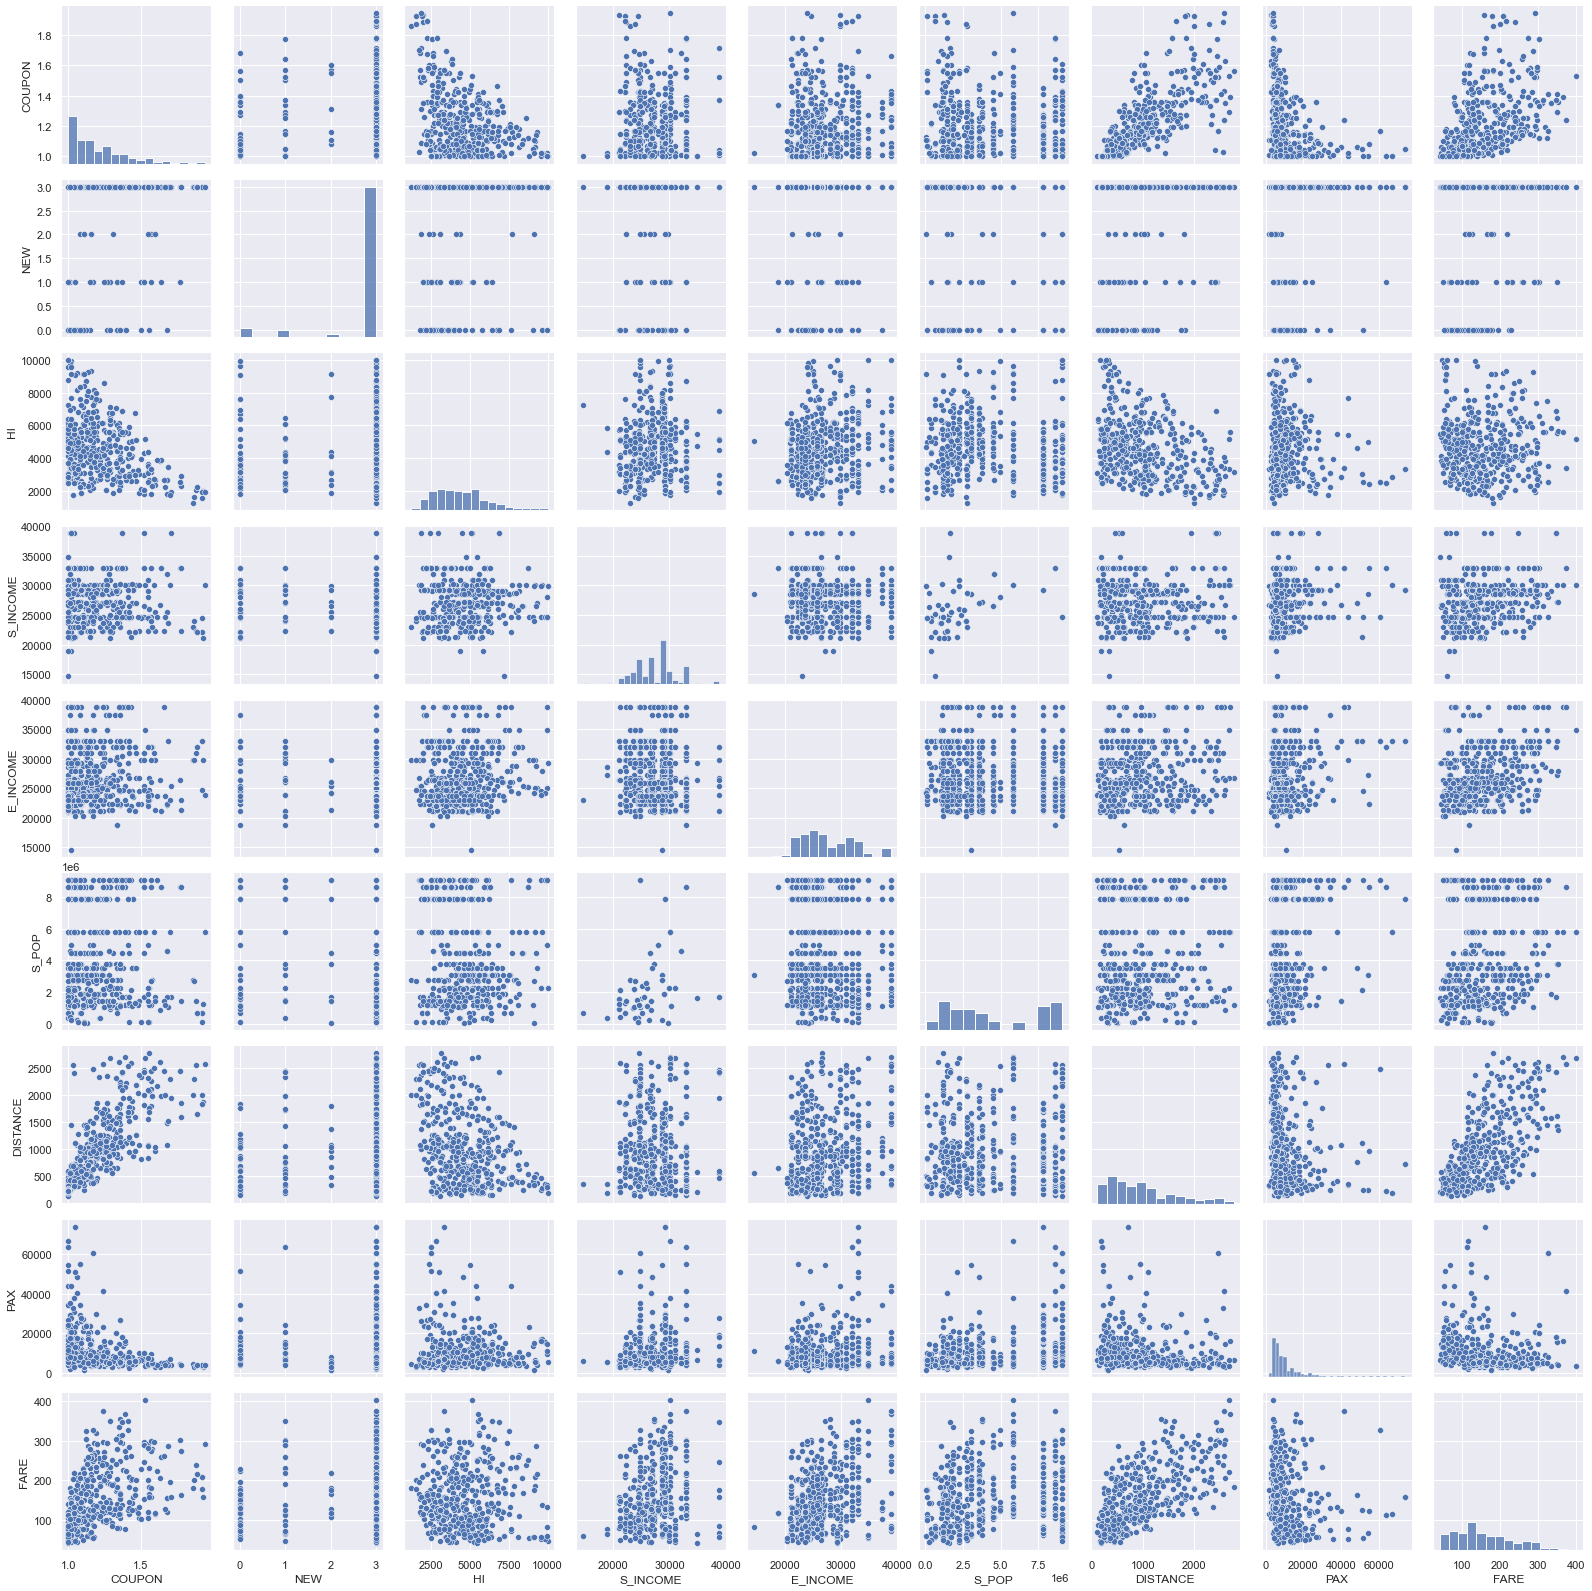

In [114]:
Airfare_DataFrame.dropna(inplace=True)
Airfare_DataFrame.shape
Airfare_DataFrame_numeric = Airfare_DataFrame[['COUPON','NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'DISTANCE', 'PAX', 'FARE']]
sns.pairplot(Airfare_DataFrame_numeric)

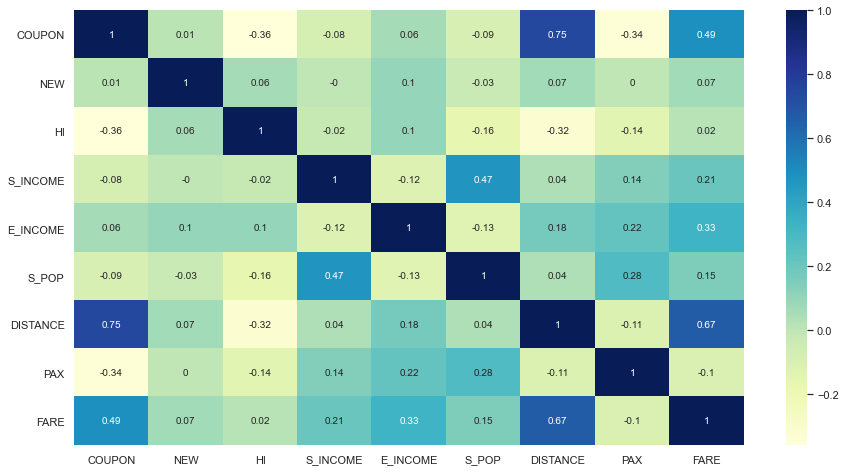

In [115]:
# We re-check the correlation after dropping the duplicates


# Optional - One can set the size of the heatmap to avoid congestion
plt.figure(figsize = (15,8))

# Find the correlation of metrics with each other and round the values to two decimal places
Airfare_Corr_Matrix = Airfare_DataFrame_numeric.corr().round(2)

# Print the values using a heatmap to visually learn the strength of Correlation between the metrics
sns.heatmap(data=Airfare_Corr_Matrix, annot=True, cmap="YlGnBu")
plt.show()

#Distance and Coupon seem to have a high correlation between them

In [116]:
# As we concluded Distance and Coupon seem to be highly correlated even after the cleaning the data.
X=Airfare_DataFrame['DISTANCE'] # Independent Variable
y=Airfare_DataFrame['FARE']   # Dependent Variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [117]:
# Reshape Train and Test Data
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [118]:
# Now that we are ready with the data, we can start with Linear Regression and fitting the model to training data
Linear_R_Model = LinearRegression()   
Linear_R_Model.fit(x_train, y_train)  

LinearRegression()

In [119]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(3)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(3)*100
    
    # Create MSE
    mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
    
    train_metrics = [r2, adj_r2, mae, mape,mse]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)}))
    print('\n')
    print(all_metrics)
    print('\n')

In [120]:
predictors = ['DISTANCE']
X = Airfare_DataFrame[predictors]
y = Airfare_DataFrame['FARE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

  Predictor  coefficent
0  DISTANCE       0.078


              Train        Test
R2            0.447       0.454
Adj-R2        0.446       0.450
MAE          47.680      44.760
MAPE         37.100      32.300
SSE     1422651.761  441965.542




In [121]:
# Model for Train Data
y_train_predict = Linear_R_Model.predict(x_train)
mape = mean_absolute_percentage_error(y_train, y_train_predict)

print("Model performance for train set MAPE is {}".format(mape))
print("\n")

# Model for Test Data
y_test_predict = Linear_R_Model.predict(X_test)
mape =  mean_absolute_percentage_error(y_test, y_test_predict)

print("Model performance for test set MAPE is {}".format(mape))


Model performance for train set MAPE is 0.37082836210232095


Model performance for test set MAPE is 0.3230056450000143


In [122]:
Linear_R_Model.coef_

array([[0.07797352]])

__Question 1: Create a simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.__

1. How did you choose the explanatory variable? 

Answer: The data is set to get Airfare, hence I believe it is a good idea to consider Fare as a dependent variable as all the other metrics will affect Final Fare, for the simple predictive model I've taken Distance because based on the correlation matrix Distance has the maximum correlation with Fare which is 0.67. 

2. Does your model under or overfit the data? How do you know?

Answer: 
 a. Additional Distance is expected to increase Fare by 0.078, all other variables held constant.
 b. The average percentage prediction error for our test data is 32.3%
 
 The model seems to over fit, the MAPE values also seem to be less for both training and test data that is 37% and 32% respectively.


In [123]:
predictors_Q2 = ['COUPON','S_INCOME','E_INCOME']
X1 = Airfare_DataFrame[predictors_Q2]
y1 = Airfare_DataFrame['FARE']

x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25,random_state=1)

model1 = Ridge(normalize=True)
model1.fit(x1_train,y1_train)

train_test_metrics(x1_train,x1_test,y1_train,y1_test,model1)

  Predictor  coefficent
0    COUPON     104.537
1  S_INCOME       0.003
2  E_INCOME       0.003


              Train        Test
R2            0.335       0.278
Adj-R2        0.330       0.263
MAE          52.757      51.183
MAPE         43.600      39.900
SSE     1711213.518  584812.158




__Create a slightly more complicated predictive model of the target variable. In particular, add 1-3 more variables that you think have potential to improve your model. Take note of any differences in model performance from 1 to 2. Do you notice any major changes in the magnitudes of your parameter estimates?__

Perviously we took DISTANCE and in order to make a slightly more complicated predictive model we are considering S_INCOME, E_INCOME and COUPON.

__Pick one parameter estimate and, in words, describe what it means? Add all potential explanatory variables to your model and any data transformations you think could be helpful.__

To determine how other variables impacts FARE we observe that S_INCOME goes slightly up by 0.003 and that's the same for E_INCOME. 
Having said that COUPON projects highest potential among these variables while determining the target variable and everytime COUPON increases the FARE increases by USD 104.5 .

In [124]:
predictors_Q3 = ['NEW', 'HI', 'S_INCOME', 'E_INCOME',
       'S_POP', 'E_POP', 'DISTANCE', 'PAX']

X2 = Airfare_DataFrame[predictors_Q3]
y2 = Airfare_DataFrame['FARE']

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model2 = RidgeCV(alphas=r_alphas,normalize=True)
model2.fit(X2_train,y2_train)

train_test_metrics(X2_train,X2_test,y2_train,y2_test,model2)

  Predictor  coefficent
0       NEW       0.621
1        HI       0.008
2  S_INCOME       0.005
3  E_INCOME       0.003
4     S_POP       0.000
5     E_POP       0.000
6  DISTANCE       0.068
7       PAX      -0.002


             Train        Test
R2           0.687       0.674
Adj-R2       0.681       0.655
MAE         34.171      33.966
MAPE        27.000      23.800
SSE     805106.097  264139.488




__Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form. Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.__

When we consider all the metrics/variables and use ridge, the model seems to perform well, we observe that New and Distance impacts FARE the maximum resulting to a good fit with low degree of model variability whereas S_POP and E_POP seem to add no value to the model. 

## DataSet 2: The following code is to do analysis on Boston Housing

In [125]:
# Read the Data
Boston_Housing = pd.read_csv("BostonHousing.csv")

In [126]:
Boston_Housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9,0


In [127]:
# Check for missing values
Boston_Housing.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

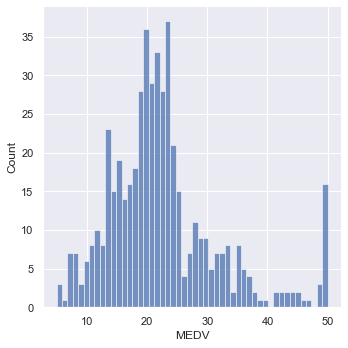

In [128]:
sns.set(rc={'figure.figsize':(20,20)})
sns.displot(Boston_Housing['MEDV'], bins=50)
plt.show()

This helps us understand that MEDV is alomost normally distributed with some outliers/exceptions at 50.

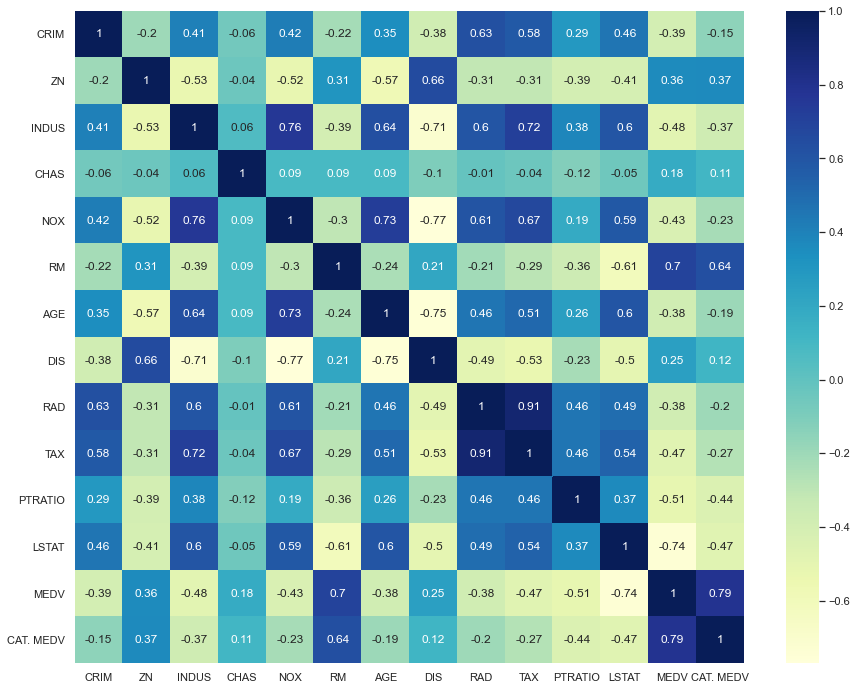

In [129]:
plt.figure(figsize = (15,12))
correlation_matrix = Boston_Housing.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu");

In [130]:
X1 = pd.DataFrame(Boston_Housing['RM'], columns = ['RM'])
Y1 = Boston_Housing['MEDV']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state=1)

lin_model1 = LinearRegression()  
lin_model1.fit(X1_train, Y1_train)

train_test_metrics(X1_train,X1_test,Y1_train,Y1_test,lin_model1)

  Predictor  coefficent
0        RM         8.5


            Train      Test
R2          0.429     0.604
Adj-R2      0.427     0.601
MAE         4.406     4.720
MAPE       25.500    27.300
SSE     17177.669  4976.322




__Question 1: Create a simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.__

1. How did you choose the explanatory variable? 

Answer: We have already seen that MEDV is normally distributed, CAT_MEDV seems to have the highest correlation with MEDV, however I feel that it is a dervied variable of MEDV hence the high correlation. Next we see RM to have high correlation with MEDV therefore we choose that to build a simple predictive model.

2. Does your model under or overfit the data? How do you know?

Answer: The model seems to over fit, the MAPE values also seem to be less for both training and test data that is 25% and 27% respectively,also the R Squared value seems around 0.5. 


In [131]:
X2 = Boston_Housing[['LSTAT','PTRATIO','INDUS']]
Y2 = Boston_Housing['MEDV']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.25, random_state=1)

from sklearn.linear_model import Ridge

Ridge_Reg = Ridge(normalize=True)
Ridge_Reg.fit(X2_train,Y2_train)

train_test_metrics(X2_train,X2_test,Y2_train,Y2_test,Ridge_Reg)

  Predictor  coefficent
0     LSTAT      -0.373
1   PTRATIO      -0.720
2     INDUS      -0.154


            Train      Test
R2          0.504     0.464
Adj-R2      0.500     0.451
MAE         4.305     5.134
MAPE       21.800    24.300
SSE     14929.029  6738.021




__Create a slightly more complicated predictive model of the target variable. In particular, add 1-3 more variables that you think have potential to improve your model. Take note of any differences in model performance from 1 to 2. Do you notice any major changes in the magnitudes of your parameter estimates?__

Perviously we took RM and in order to make a slightly more complicated predictive model we are considering LSTAT,PTRATIO,INDUS.

__Pick one parameter estimate and, in words, describe what it means? Add all potential explanatory variables to your model and any data transformations you think could be helpful.__

To determine how other variables impacts MEDV we observe that PTRATIO, LSTAT, INDUS impact MEDV negatively in descending order. Comparatively PTRATIO highly influences MEDV 


In [132]:
Boston_Housing.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'], dtype=object)

In [133]:
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD','PTRATIO', 'LSTAT']
X3 = Boston_Housing[predictors]
y3 = Boston_Housing['MEDV']

X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas,normalize=True)
model.fit(X3_train,y3_train)

train_test_metrics(X3_train,X3_test,y3_train,y3_test,model)


  Predictor  coefficent
0      CRIM      -0.088
1        ZN      -0.000
2     INDUS       0.029
3      CHAS       2.956
4       NOX     -12.696
5        RM       3.298
6       AGE       0.026
7       RAD       0.108
8   PTRATIO      -1.049
9     LSTAT      -0.547


           Train      Test
R2         0.679     0.723
Adj-R2     0.671     0.699
MAE        3.421     4.092
MAPE      17.100    19.600
SSE     9648.773  3485.152




__Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form. Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.__

When we use all the variables at same time, we see that the NOX, CHAS and RM have a high influence on MEDV. Maybe we cab drop ZN as it hardly has an impact on the model. Overall the model seems promising and can be a good fit.


## DataSet 3: The following code is to do analysis on Toyota Corolla

In [134]:
Toyota_Corolla = pd.read_csv("ToyotaCorolla.csv")
Toyota_Corolla.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,1,0,0,0,0,0,0,0,0


In [135]:
Toyota_Corolla.isnull().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [136]:
Toyota_Corolla_Data = Toyota_Corolla.select_dtypes(include=object)

In [137]:
Toyota_Corolla_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Fuel_Type  1436 non-null   object
 2   Color      1436 non-null   object
dtypes: object(3)
memory usage: 33.8+ KB


In [138]:
Toyota_Corolla['Model'].value_counts()

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors    109
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors     84
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors       80
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors      71
TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors     54
                                                      ... 
TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors              1
TOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-Doors       1
TOYOTA Corolla 1.6 16V S-uitvoering 2/3-Doors            1
TOYOTA Corolla 1.6 VVTi Linea Luna Lift 4/5-Doors        1
TOYOTA Corolla LIFTBACK 1.9 D Linea Terra 4/5-Doors      1
Name: Model, Length: 319, dtype: int64

In [139]:
Toyota_Corolla['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [140]:
Toyota_Corolla['Color'].value_counts()

Grey      301
Blue      283
Red       278
Green     220
Black     191
Silver    122
White      31
Violet      4
Beige       3
Yellow      3
Name: Color, dtype: int64

In [141]:
Toyota_Corolla['Cylinders'].unique()

array([4], dtype=int64)

In [142]:
Toyota_Corolla.drop(['Cylinders'],inplace=True,axis=1) 

In [143]:
Toyota_Corolla[Toyota_Corolla.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar


In [144]:
pd.get_dummies(Toyota_Corolla,columns=['Fuel_Type'],drop_first=True) # One-Hot Encodind Fuel Type

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,Blue,...,0,0,0,1,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,Silver,...,0,0,0,1,0,0,0,0,1,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,90,1,Blue,...,0,0,0,1,0,0,0,0,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,90,0,Black,...,0,0,0,1,0,0,0,0,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,Black,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,86,1,Blue,...,0,1,1,1,0,0,0,0,0,1
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,86,0,Grey,...,0,0,1,1,0,0,0,0,0,1
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,86,0,Blue,...,0,0,0,1,0,0,0,0,0,1
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,86,1,Grey,...,0,0,0,1,0,0,0,0,0,1


In [145]:
Toyota_Corolla.drop(['Fuel_Type'],inplace=True,axis=1) # dropping Fuel Type column

In [146]:
Toyota_Corolla.drop(['Mfg_Month','Mfg_Year','Id','Model'],inplace=True,axis=1) # dropping insignifacant columns

In [147]:
pd.get_dummies(Toyota_Corolla,columns=['Color'],drop_first=True)

,Price,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Gears,Quarterly_Tax,...,Tow_Bar,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,13500,23,46986,90,1,0,2000,3,5,210,...,0,0,1,0,0,0,0,0,0,0
1,13750,23,72937,90,1,0,2000,3,5,210,...,0,0,0,0,0,0,1,0,0,0
2,13950,24,41711,90,1,0,2000,3,5,210,...,0,0,1,0,0,0,0,0,0,0
3,14950,26,48000,90,0,0,2000,3,5,210,...,0,1,0,0,0,0,0,0,0,0
4,13750,30,38500,90,0,0,2000,3,5,210,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1,0,1300,3,5,69,...,0,0,1,0,0,0,0,0,0,0
1432,10845,72,19000,86,0,0,1300,3,5,69,...,0,0,0,0,1,0,0,0,0,0
1433,8500,71,17016,86,0,0,1300,3,5,69,...,0,0,1,0,0,0,0,0,0,0
1434,7250,70,16916,86,1,0,1300,3,5,69,...,0,0,0,0,1,0,0,0,0,0


In [148]:
Toyota_Corolla.drop(['Color'],inplace=True,axis=1) # dropping Color column

In [149]:
Toyota_Corolla.describe()

,Price,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Gears,Quarterly_Tax,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,5.026462,87.122563,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.188510,41.128611,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,3.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,5.000000,69.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,5.000000,85.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,5.000000,85.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,6.000000,283.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


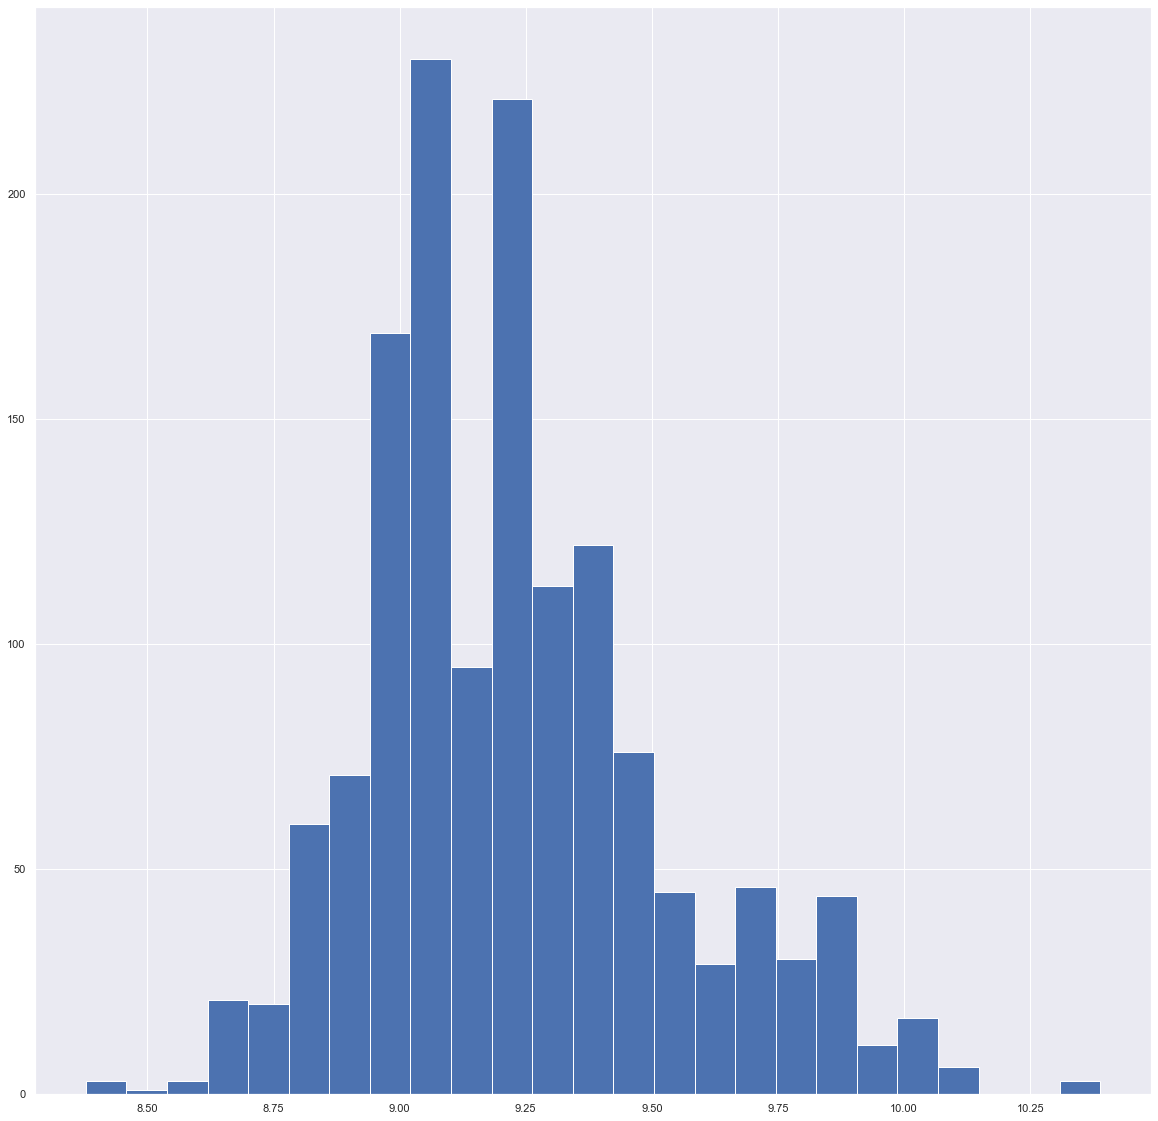

In [150]:
plt.hist(np.log(Toyota_Corolla['Price']), bins=25)  #checking the transformation to apply for Target Variable
plt.show()

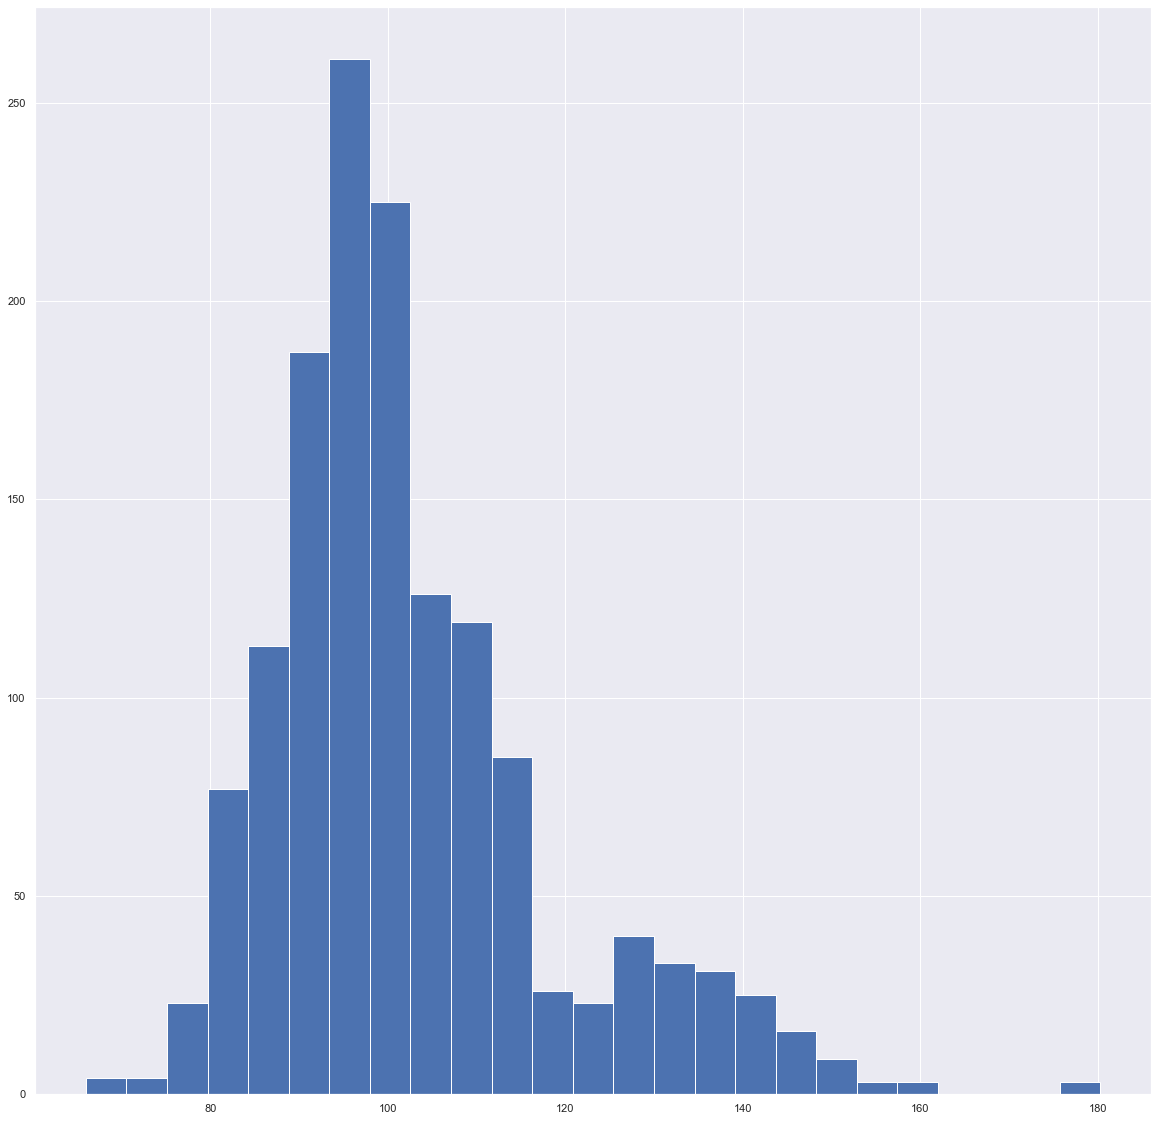

In [151]:
plt.hist(np.sqrt(Toyota_Corolla['Price']), bins=25)  #checking the transformation to apply for Target Variable
plt.show()

(array([  4.,   4.,  23.,  77., 113., 187., 261., 225., 126., 119.,  85.,
         26.,  23.,  40.,  33.,  31.,  25.,  16.,   9.,   3.,   3.,   0.,
          0.,   0.,   3.]),
 array([129.90905958, 139.0549023 , 148.20074502, 157.34658774,
        166.49243046, 175.63827318, 184.78411589, 193.92995861,
        203.07580133, 212.22164405, 221.36748677, 230.51332949,
        239.65917221, 248.80501492, 257.95085764, 267.09670036,
        276.24254308, 285.3883858 , 294.53422852, 303.68007124,
        312.82591395, 321.97175667, 331.11759939, 340.26344211,
        349.40928483, 358.55512755]),
 <BarContainer object of 25 artists>)

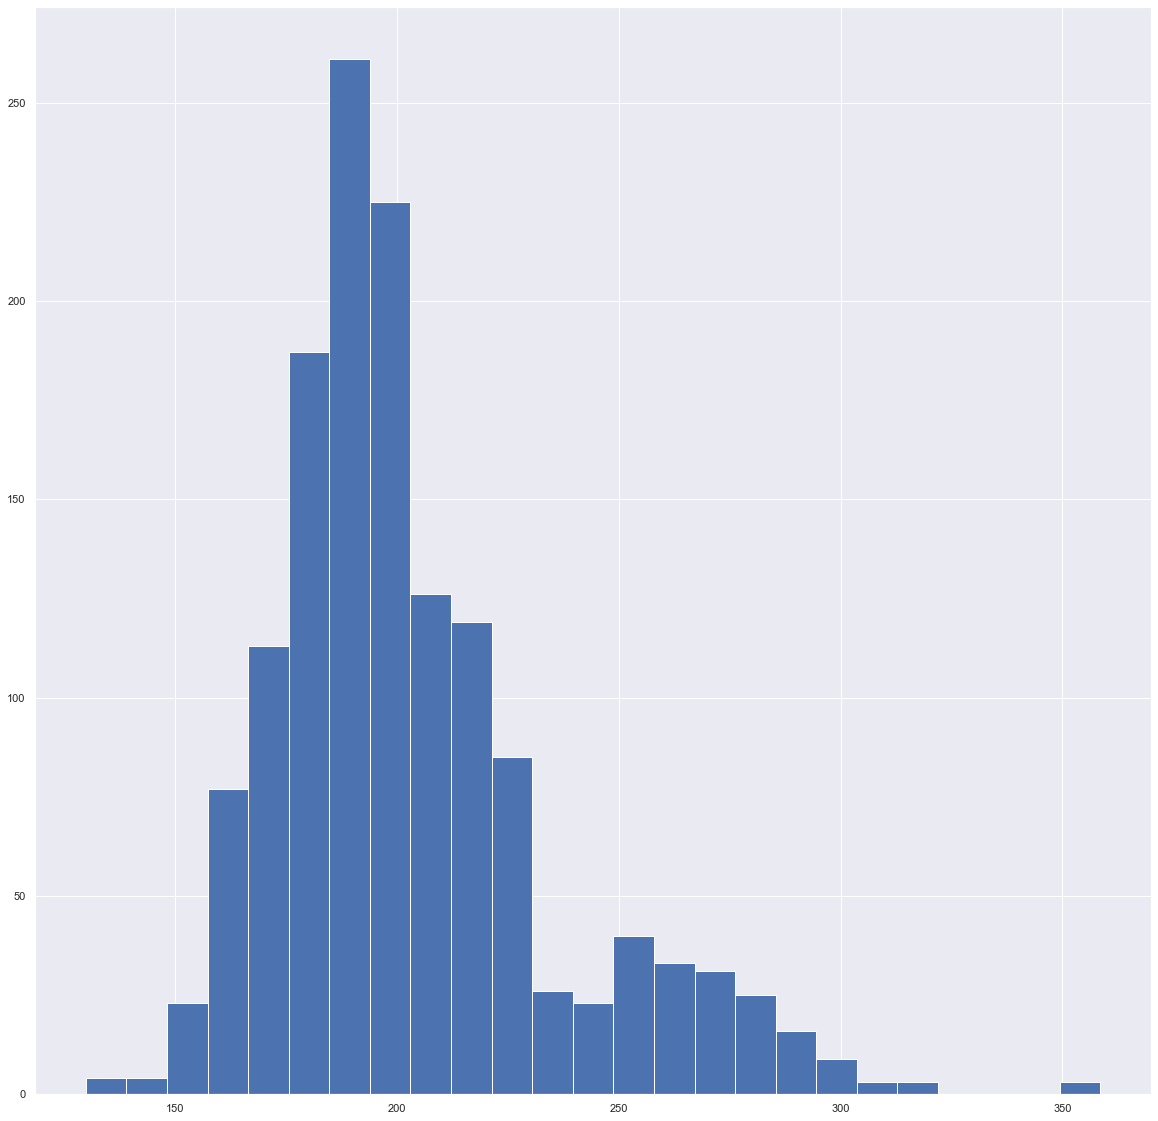

In [152]:
from scipy import stats
plt.hist(stats.boxcox(Toyota_Corolla['Price'],lmbda=0.5),bins=25)

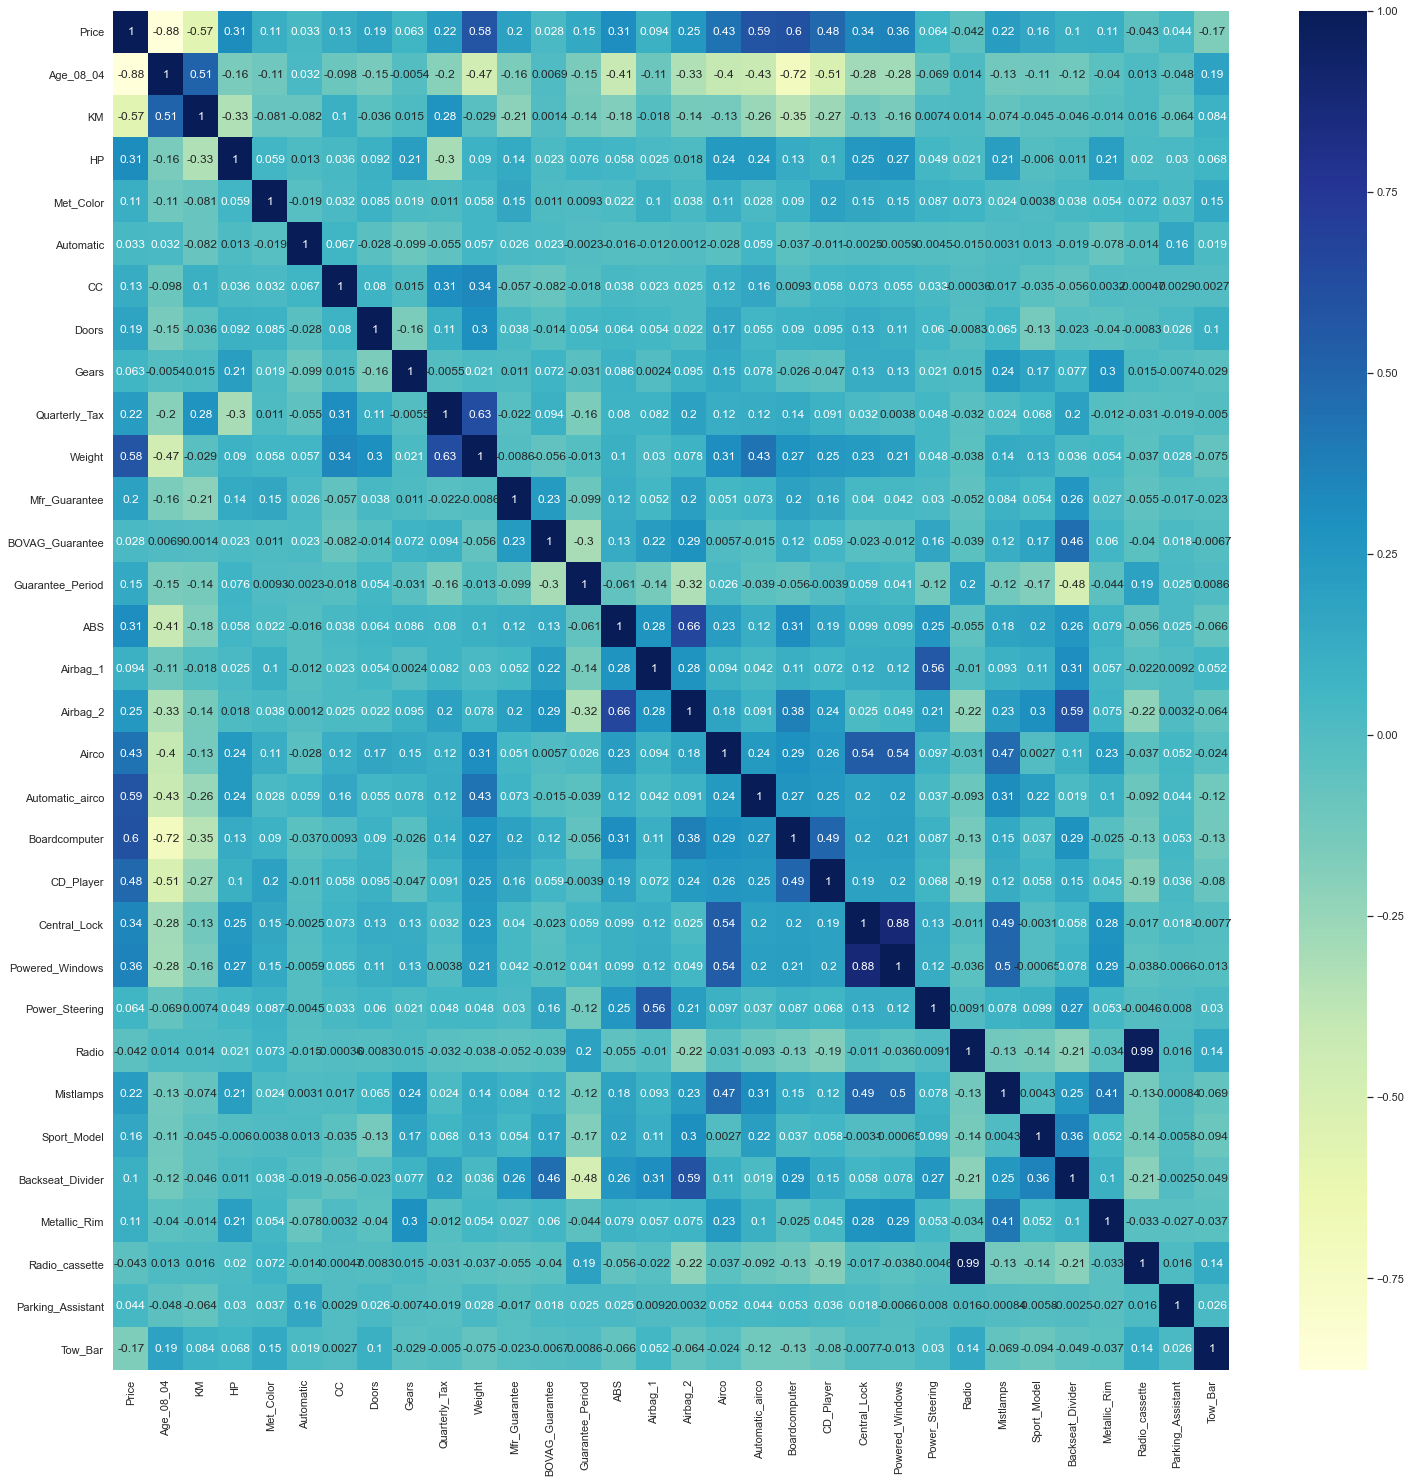

In [153]:
plt.figure(figsize=(25, 25))
sns.heatmap(Toyota_Corolla.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [154]:
predictors = ['Boardcomputer']
X5 = Toyota_Corolla[predictors]
y5 = Toyota_Corolla['Price']

X5_train,X5_test,y5_train,y5_test = train_test_split(X5,stats.boxcox(y5,lmbda=0.5),test_size=.25,random_state=1)

model5 = LinearRegression()
model5.fit(X5_train,y5_train)

train_test_metrics(X5_train,X5_test,y5_train,y5_test,model5)

       Predictor  coefficent
0  Boardcomputer       41.75


             Train        Test
R2           0.354       0.456
Adj-R2       0.353       0.455
MAE         18.923      17.844
MAPE         9.100       8.700
SSE     719534.210  203537.547




__Question 1: Create a simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.__

1. How did you choose the explanatory variable? 

Answer: Using Price as Dependent variable, we use Broadcomputer as it projects highest correlation among the other metrics.

2. Does your model under or overfit the data? How do you know?

Answer: The model seems to over fit, the MAPE values also seem to be less for both training and test data that is 9.1% and 8.7% respectively,also the R Squared value seems less than 0.5. 


In [155]:
X6 = Toyota_Corolla[['Age_08_04','Automatic_airco','Weight']]
Y6 = Toyota_Corolla['Price']
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, stats.boxcox(Y6,lmbda=0.5),test_size = 0.25,random_state=1)
model6 = Ridge(normalize=True)
model6.fit(X6_train,Y6_train)

train_test_metrics(X6_train,X6_test,Y6_train,Y6_test,model6)

         Predictor  coefficent
0        Age_08_04      -0.637
1  Automatic_airco      22.862
2           Weight       0.091


             Train        Test
R2           0.684       0.689
Adj-R2       0.683       0.686
MAE         13.433      13.800
MAPE         6.700       6.900
SSE     351661.206  116536.574




__Create a slightly more complicated predictive model of the target variable. In particular, add 1-3 more variables that you think have potential to improve your model. Take note of any differences in model performance from 1 to 2. Do you notice any major changes in the magnitudes of your parameter estimates?__

Perviously we took Broadcomputer and in order to make a slightly more complicated predictive model we are considering Age_08_04,Automatic_airco,Weight.

__Pick one parameter estimate and, in words, describe what it means? Add all potential explanatory variables to your model and any data transformations you think could be helpful.__

To determine how other variables impacts Price we observe that Automatic_airco comparatively influences the most whereas Age_08_04 impacts negatively and weight doesn't have a lot of impact.


In [156]:
# Get a list a all the columns present in the data set to run the last regression with all variables
Toyota_Corolla.columns.values 

array(['Price', 'Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC',
       'Doors', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1',
       'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider',
       'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype=object)

In [157]:
predictors = ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC',
       'Doors', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1',
       'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider',
       'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
X7 = Toyota_Corolla[predictors]
y7 = Toyota_Corolla['Price']

X7_train,X7_test,y7_train,y7_test = train_test_split(X7,stats.boxcox(y7,lmbda=0.5),test_size=0.25,random_state=1)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

Lasso_Reg = LassoCV(alphas=r_alphas,normalize=True)
Lasso_Reg.fit(X7_train,y7_train)

train_test_metrics(X7_train,X7_test,y7_train,y7_test,Lasso_Reg)


            Predictor  coefficent
0           Age_08_04      -1.031
1                  KM      -0.000
2                  HP       0.178
3           Met_Color       0.000
4           Automatic       0.000
5                  CC       0.000
6               Doors       0.000
7               Gears       0.000
8       Quarterly_Tax       0.008
9              Weight       0.080
10      Mfr_Guarantee       0.777
11    BOVAG_Guarantee       0.000
12   Guarantee_Period       0.000
13                ABS       0.000
14           Airbag_1       0.000
15           Airbag_2       0.000
16              Airco       1.403
17    Automatic_airco      16.417
18      Boardcomputer       0.000
19          CD_Player       0.284
20       Central_Lock       0.288
21    Powered_Windows       2.038
22     Power_Steering      -0.000
23              Radio      -0.000
24          Mistlamps       0.000
25        Sport_Model       0.000
26   Backseat_Divider       0.000
27       Metallic_Rim       0.065
28     Radio_c

In [158]:
print('LassoCV Alpha Selection: ',model.alpha_)

LassoCV Alpha Selection:  0.04


__Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form. Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.__

When we use all the variables at same time, we see that the Automatic_airco still influences the model most, however we can drop some of the variables such as Radio, Mistlamps, Sport_Model, Backseat_Divider, Air bag, Gears, Doors and some more. Powered windows and HP seems to influence Price highly. With MAPE values for train and test as low as 4.3 and 4.4 the model seems promising and should fit.  